In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
import re

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%run ./jlu_preprocessing.ipynb
%run ./spk_preprocessing.ipynb

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# data = pd.read_excel(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets.xls')
data = pd.read_csv(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets_main.csv', engine='python') #encoding = "cp1252"
data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [4]:
data['existence'] = data['existence'].fillna('No')
data[data['existence']=="No"].tweet

14      Spring storm season starting a little late thi...
17      Wait here's an idea: it's natural climate chan...
31      @New_federalists  i have it on good auth tht g...
32      Illegal war and the myth of global warming|My ...
33      the scientific community was scamed by global ...
                              ...                        
6069    Is Global Warming A Hoax? - Find Answers to th...
6072    RT @brookedunne: Intl Conference of Scientists...
6074    Global Warming Fanatics Clash With Environment...
6083    RT @EPSclimate: Climate change row over the my...
6086    Virginia to Investigate Global Warming Scienti...
Name: tweet, Length: 1926, dtype: object

In [5]:
print(data['existence'].value_counts())

Y      2554
No     1926
N      1053
Yes     557
Name: existence, dtype: int64


In [6]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data = data.drop_duplicates()
data = data.dropna()
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
print(data.shape)
data.dropna()
data.loc[data['existence'] == np.nan,'existence'] = "No"
print(data['existence'].value_counts())
print(data.shape)
data.head()

(5960, 4)
Yes    3029
No     2931
Name: existence, dtype: int64
(5960, 4)


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [7]:
data['tweet']

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6085    @bloodless_coup "The phrase 'global warming' s...
6086    Virginia to Investigate Global Warming Scienti...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 5960, dtype: object

In [8]:
tweets = data["tweet"]
# tweets = tweets.drop_duplicates()
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6085    @bloodless_coup "The phrase 'global warming' s...
6086    Virginia to Investigate Global Warming Scienti...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 5960, dtype: object

In [9]:
# tweets[:100]

In [10]:
# python -m spacy download en_core_web_sm
preprocessed_tweets,indices = preprocess_tweets(tweets)

{'hunger', 'increase', 'government', 'urge', 'warming', 'face', 'global', 'belgium', 'report', 'world'} 
---

{'warming', 'fight', 'poverty', 'africa', 'global'} 
---

{'vatican', 'carbon', 'warming', 'reduce', 'forest', 'offset', 'fail', 'global'} 
---

{'vatican', 'carbon', 'warming', 'reduce', 'forest', 'offset', 'fail', 'global'} 
---

{'uruguay', 'change', 'climate', 'vulnerable', 'tool', 'need'} 
---

{'warming', 'intensify', 'ocean', 'show', 'water', 'saltiness', 'global', 'cycle'} 
---

{'warming', 'evidence', 'look', 'doubter', 'message', 'global', 'denier'} 
---

{'change', 'climate', 'migratory', 'bird', 'home', 'stay', 'strategy'} 
---

{'limpopo', 'temperature', 'change', 'climate', 'bring', 'southern', 'high', 'compete', 'water', 'africa', 'southe'} 
---

{'scarcity', 'warming', 'wheat', 'rice', 'water', 'global', 'impact', 'production'} 
---

{'preliminary', 'warming', 'contribute', 'suggest', 'analysis', 'natural', 'global', 'previously'} 
---

{'perspective', 'populati

{'bleh', 'morning', 'change', 'york', 'climate', 'fall', 'beautiful', 'thank', 'weather'} 
---

{'culture', 'change', 'climate', 'japan', 'familiar', 'threaten', 'blossom', 'cherry', 'environment'} 
---

{'podcast', 'change', 'climate', 'mountain', 'stretch', 'valley', 'apart', 'temp'} 
---

{'change', 'climate', 'mountain', 'stretch', 'valley', 'apart', 'temp'} 
---

{'carbon', 'change', 'climate', 'absorb', 'forest', 'activist'} 
---

{'april', 'sign', 'arctic', 'rain', 'canadian', 'global'} 
---

{'microbe', 'contribute', 'conn', 'haven', 'global'} 
---

{'microbe', 'contribute', 'conn', 'haven', 'global'} 
---

{'foreign', 'minister', 'nation', 'south', 'change', 'climate', 'secluded', 'asian', 'fight'} 
---

{'increase', 'death', 'damage', 'change', 'climate', 'property', 'heat', 'wave', 'reuters'} 
---

{'james', 'real', 'change', 'hansen', 'green', 'climate', 'heather', 'false', 'hope', 'rogers', 'solution', 'wrong', 'go'} 
---

{'leap', 'mean', 'seriously', 'change', 'climate',

{'event', 'change', 'climate', 'nnimmo', 'bassey', 'struggle', 'important', 'environmentalist', 'nigerian'} 
---

{'military', 'change', 'climate', 'fight', 'lead'} 
---

{'evrything', 'inclde', 'issue', 'stake', 'identify', 'change', 'climate', 'affctd', 'mental', 'report', 'health', 'disease'} 
---

{'change', 'resource', 'climate', 'earth', 'cope'} 
---

{'warming', 'intensify', 'ocean', 'show', 'water', 'saltiness', 'global', 'cycle'} 
---

{'americans', 'change', 'climate', 'bauccio', 'time', 'combat', 'meal', 'week', 'fedele', 'celebrate', 'anniver'} 
---

{'support', 'cochabamba', 'people', 'live', 'change', 'climate', 'conf', 'world'} 
---

{'lot', 'push', 'change', 'climate', 'protocol', 'barrett', 'small', 'well', 'comprehensive'} 
---

{'complicate', 'warming', 'mountain', 'rate', 'topography', 'global'} 
---

{'support', 'cochabamba', 'people', 'bolivia', 'live', 'change', 'climate', 'watch', 'conference', 'world'} 
---

{'issue', 'smallpox', 'change', 'climate', 'require',

{'switch', 'warming', 'warn', 'long', 'accelerate', 'renewable', 'scientist', 'need', 'global'} 
---

{'culprit', 'pollen', 'chart', 'change', 'climate', 'count'} 
---

{'tired', 'change', 'level', 'climate', 'ground', 'coalition', 'fight', 'wait'} 
---

{'wednesday', 'season', 'change', 'climate', 'wildlife', 'report', 'release', 'national', 'allergy', 'worsen'} 
---

{'tired', 'change', 'level', 'climate', 'ground', 'coalition', 'fight', 'wait'} 
---

{'author', 'america', 'rain', 'south', 'change', 'climate', 'entire', 'planet', 'affect', 'amazon', 'nikola', 'kozloff'} 
---

{'tired', 'change', 'level', 'climate', 'ground', 'coalition', 'fight', 'wait'} 
---

{'tired', 'change', 'level', 'climate', 'ground', 'coalition', 'fight', 'wait'} 
---

{'tired', 'change', 'level', 'climate', 'ground', 'coalition', 'fight', 'wait'} 
---

{'season', 'change', 'climate', 'bad', 'allergy', 'report'} 
---

{'article', 'denialist', 'mention', 'send', 'finnish', 'purportedly', 'warming', 'refute', 

{'people', 'change', 'climate', 'filmmaker', 'globe', 'find', 'fight', 'travel'} 
---

{'oilspill', 'america', 'gulf', 'warming', 'future', 'energy', 'fight', 'effort', 'spur', 'remake', 'global', 'harm'} 
---

{'unemployment', 'decade', 'person', 'change', 'climate', 'planet', 'catastrophic', 'think', 'life', 'average'} 
---

{'get', 'loss', 'arctic', 'warming', 'bad', 'accelerate', 'research', 'zealand', 'global', 'topnew'} 
---

{'california', 'change', 'climate', 'take', 'lead'} 
---

{'leave', 'warming', 'washington', 'effective', 'tackle', 'account', 'global', 'plant'} 
---

{'govt', 'change', 'active', 'climate', 'namibia'} 
---

{'warming', 'effective', 'tackle', 'global', 'plant'} 
---

{'change', 'climate', 'warming', 'idea', 'wait', 'natural', 'human', 'global', 'induce'} 
---

{'general', 'america', 'change', 'read', 'climate', 'threaten', 'security'} 
---

{'earthweek', 'warming', 'planet', 'glacial', 'volcanos', 'diary', 'melt', 'unplug', 'eruption', 'global'} 
---

{'mil

{'change', 'climate', 'photo', 'tell', 'dare', 'real'} 
---

{'climate', 'warming', 'brian', 'treehugger', 'unequivocal', 'action', 'merchant', 'release', 'brooklyn', 'global', 'report'} 
---

{'volcano', 'hekla', 'warming', 'nature', 'global', 'icelandic', 'earthquake', 'mother'} 
---

{'volcano', 'warming', 'trouble', 'global', 'blame'} 
---

{'reminder', 'warming', 'agree', 'scientist', 'politician', 'nearly', 'health', 'global', 'debate'} 
---

{'volcano', 'hekla', 'warming', 'earth', 'ashtag', 'global', 'icelandic', 'earthquake', 'mother'} 
---

{'change', 'climate', 'biden', 'romm', 'quote'} 
---

{'change', 'climate', 'green', 'stop', 'living', 'idea', 'reinvent', 'city'} 
---

{'cleantechnica', 'throw', 'change', 'climate', 'curve', 'baseball', 'major', 'league', 'denier', 'team'} 
---

{'warming', 'pollution', 'lack', 'global', 'pirate'} 
---

{'decade', 'migrating', 'change', 'warming', 'billion', 'bird', 'estimate', 'global', 'habit'} 
---

{'system', 'warming', 'tell', 'reu

{'change', 'climate', 'warming', 'science', 'algore', 'global', 'hoax', 'gore', 'hack', 'real', 'palin'} 
---

{'anti', 'warming', 'stranger', 'magazine', 'scientist', 'academic', 'nature', 'wrong', 'journal', 'global'} 
---

{'warming', 'grandson', 'headache', 'flunk', 'tell', 'teacher', 'threaten', 'global', 'hoax', 'argue'} 
---

{'like', 'warming', 'exec', 'goldman', 'global'} 
---

{'warming', 'climate', 'nasa', 'measure', 'difference', 'baloney', 'weather', 'global', 'expert', 'accord'} 
---

{'warming', 'syste', 'public', 'case', 'fraud', 'michael', 'early', 'tracy', 'school', 'global', 'voice'} 
---

{'true', 'idiot', 'warming', 'forensic', 'computer', 'global', 'expert', 'belive'} 
---

{'learn', 'liberal', 'looney', 'warming', 'artic', 'alarmist', 'frost', 'bite', 'home', 'global', 'toon', 'come'} 
---

{'copyright', 'author', 'people', 'content', 'warming', 'property', 'degree', 'heat', 'message', 'global', 'dear'} 
---

{'wear', 'california', 'warming', 'glove', 'fanatic', 

{'park', 'warming', 'heart', 'alexia', 'global'} 
---

{'park', 'warming', 'thousand', 'take', 'alexia', 'place', 'action', 'conscious', 'global'} 
---

{'park', 'million', 'warming', 'thousand', 'heart', 'alexia', 'earth', 'consc', 'global'} 
---

{'park', 'million', 'warming', 'thousand', 'heart', 'alexia', 'earth', 'consc', 'global'} 
---

{'survey', 'change', 'climate', 'find', 'shit'} 
---

{'author', 'warm', 'create', 'lawmaker', 'touts', 'webb', 'legislation', 'rock', 'arkansa', 'global'} 
---

{'author', 'warm', 'create', 'lawmaker', 'touts', 'webb', 'legislation', 'rock', 'arkansa', 'global'} 
---

{'bill', 'senate', 'change', 'climate', 'broker', 'drop', 'monday', 'long', 'await', 'senator'} 
---

{'change', 'climate', 'tribeca', 'right', 'sebastian', 'premiere', 'copeland'} 
---

{'divide', 'warming', 'meteorologist', 'global', 'climatologist'} 
---

{'chinese', 'fact', 'culture', 'climate', 'warming', 'science', 'separate', 'shock', 'book', 'global', 'whisper'} 
---

{'warm

{'fellow', 'change', 'green', 'climate', 'wyss'} 
---

{'care', 'ezra', 'change', 'klein', 'climate', 'lindsey', 'graham', 'immigration', 'equally'} 
---

{'global', 'debate', 'climate', 'warming', 'sue', 'scientist', 'newspaper', 'poison', 'environment'} 
---

{'postpartisan', 'hapless', 'harry', 'reid', 'climate', 'change', 'play', 'immigration'} 
---

{'quiz', 'police', 'change', 'climate', 'energy', 'news', 'sceptics', 'canada', 'press', 'headline'} 
---

{'smile', 'brighten', 'warming', 'have', 'refrain', 'combat', 'come', 'global'} 
---

{'people', 'family', 'change', 'help', 'climate', 'way', 'economy', 'focus', 'difficult', 'trial', 'collagen', 'clinical'} 
---

{'bill', 'change', 'limbo', 'climate', 'house', 'push', 'reform', 'immigration', 'follow', 'white', 'dead'} 
---

{'workout', 'change', 'climate', 'simpson', 'macbeth', 'country', 'wine', 'tenther', 'census', 'plan', 'dunkin'} 
---

{'talk', 'change', 'climate', 'frank', 'focus', 'point', 'reform', 'immigration', 'great

{'hold', 'bill', 'senate', 'change', 'climate', 'place', 'long', 'legislation', 'await'} 
---

{'americans', 'say', 'survey', 'warming', 'investor', 'retail', 'city', 'global'} 
---

{'policy', 'people', 'change', 'climate', 'indigenous', 'include'} 
---

{'push', 'change', 'bill', 'dem', 'climate', 'cnnbrk', 'graham', 'immigration', 'imperil'} 
---

{'polluter', 'bill', 'change', 'climate', 'give', 'nuclear', 'break', 'washington', 'reuters', 'expect'} 
---

{'ombudsman', 'purportedly', 'warming', 'sonali', 'eurasia', 'huria', 'global', 'review', 'ipc'} 
---

{'hold', 'awesome', 'read', 'change', 'climate', 'blog', 'conference', 'cancun'} 
---

{'add', 'neham', 'brochure', 'warming', 'global', 'comment'} 
---

{'million', 'warming', 'thousand', 'heart', 'earth', 'action', 'conscious', 'global'} 
---

{'loss', 'change', 'climate', 'clip', 'clinique', 'collagen', 'program', 'trial', 'screaming', 'clinical', 'clothe'} 
---

{'datum', 'climate', 'warming', 'suggest', 'assumption', 'global

{'million', 'warming', 'cut', 'hester', 'take', 'chris', 'christie', 'prevention', 'global'} 
---

{'warming', 'safety', 'silly', 'call', 'regulator', 'blankenship', 'global'} 
---

{'warming', 'safety', 'silly', 'call', 'rule', 'coal', 'global'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'senator'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'reuters', 'senator'} 
---

{'myth', 'corner', 'warm', 'certain', 'street', 'urgh', 'washington', 'counsel', 'element', 'post', 'global', 'item', 'sunday'} 
---

{'clin', 'change', 'wedding', 'climate', 'find', 'collagen', 'guest', 'trial', 'right', 'gift', 'clinical'} 
---

{'like', 'april', 'warming', 'feel', 'right', 'global', 'shower', 'winter'} 
---

{'archive', 'noel', 'fairness', 'moderate', 'warming', 'funny', 'sheppard', 'colbert', 'stephen', 'global', 'debate', 'sunday'} 
---

{'central', 'moderate', 'warming', 'colbert', 'comedy', 'actually', 'stephen', 'global', 'debate', 'tuesday'} 
---

{'keep', 'ba

{'warming', 'forest', 'global', 'colorado', 'kill'} 
---

{'event', 'change', 'climate', 'mobilize', 'tipping', 'science', 'point', 'fight', 'mediaglobal', 'earth', 'special', 'report'} 
---

{'yesterday', 'change', 'discussion', 'climate', 'mobilize', 'science', 'fight', 'rebekah', 'review', 'mintzer'} 
---

{'warming', 'forest', 'global', 'colorado', 'kill'} 
---

{'lesson', 'arrive', 'people', 'change', 'climate', 'indigenous', 'climat', 'united', 'combat', 'nations', 'world'} 
---

{'change', 'climate', 'continent', 'vulnerable', 'service', 'meteorology', 'africa', 'gear'} 
---

{'carbon', 'mention', 'change', 'step', 'green', 'climate', 'living', 'daunting', 'gecko', 'credit'} 
---

{'fix', 'environmental', 'china', 'impact', 'expansion', 'world', 'sizable', 'rapid', 'global', 'come'} 
---

{'fix', 'environmental', 'china', 'impact', 'expansion', 'world', 'sizable', 'rapid', 'global', 'come'} 
---

{'listing', 'confront', 'change', 'york', 'green', 'examine', 'climate', 'check', '

{'change', 'bet', 'climate', 'corporation', 'conclude', 'increasingly', 'real'} 
---

{'house', 'earthday', 'branson', 'right', 'message', 'global', 'richard'} 
---

{'animal', 'warming', 'monday', 'wise', 'bad', 'cynthia', 'meat', 'make', 'global', 'bateman', 'agriculture'} 
---

{'cap', 'help', 'warming', 'melt', 'trigger', 'global', 'volcanic', 'eruption'} 
---

{'declare', 'warming', 'state', 'unequivocal', 'break', 'dept', 'human', 'global', 'induce', 'primarily'} 
---

{'cap', 'warming', 'melt', 'trigger', 'global', 'volcanic', 'eruption'} 
---

{'fix', 'kind', 'warming', 'sigh', 'idea', 'love', 'environmentalism', 'come', 'class', 'global'} 
---

{'awareness', 'increase', 'threat', 'green', 'warming', 'overview', 'revolution', 'global', 'go'} 
---

{'limpopo', 'temperature', 'change', 'climate', 'bring', 'southern', 'high', 'compete', 'water', 'africa', 'southe'} 
---

{'hekla', 'year', 'warming', 'iceland', 'spill', 'earth', 'global', 'eruption', 'strike'} 
---

{'america', 'ch

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'sign', 'change', 'climate', 'congress', 'petition', 'demand', 'action'} 
---

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'carbon', 'change', 'climate', 'legislation', 'kill'} 
---

{'obama', 'interview', 'say', 'allow', 'change', 'climate', 'wait', 'tackle', 'china'} 
---

{'change', 'help', 'climate', 'wildlife', 'sierraclub', 'saveterra', 'habitat', 'protect', 'action', 'climatechange'} 
---

{'change', 'help', 'cl

{'defense', 'change', 'resource', 'climate', 'evidence', 'warming', 'show', 'counc', 'natural', 'global', 'indicator', 'report'} 
---

{'raise', 'change', 'exclusive', 'climate', 'cost', 'allergy'} 
---

{'husin', 'syed', 'warming', 'malaysia', 'want', 'know', 'effect', 'global'} 
---

{'mayeda', 'trek', 'warming', 'lori', 'preuitt', 'voyage', 'fight', 'convinced', 'star', 'home', 'whale', 'global'} 
---

{'raise', 'change', 'exclusive', 'climate', 'allergies', 'cost'} 
---

{'support', 'kesner', 'fact', 'warming', 'reliable', 'case', 'writer', 'charle', 'global', 'touch', 'letter', 'recent'} 
---

{'change', 'climate', 'study', 'threaten', 'health'} 
---

{'slideshow', 'warming', 'alaska', 'effect', 'global'} 
---

{'delicate', 'grape', 'good', 'vino', 'verita', 'system', 'warming', 'wine', 'warn', 'effect', 'early', 'global'} 
---

{'change', 'help', 'climate', 'international', 'provide', 'habitat', 'specie', 'endangered', 'prevent', 'gift', 'conservation'} 
---

{'increase', 'warmin

{'read', 'warming', 'fight', 'effect', 'know', 'think', 'post', 'global'} 
---

{'warming', 'news', 'poverty', 'battle', 'global', 'online'} 
---

{'warming', 'eaarth', 'deal', 'stay', 'global'} 
---

{'warming', 'bad', 'allergy', 'global', 'blame'} 
---

{'partner', 'change', 'climate', 'fight', 'trade', 'important', 'germany'} 
---

{'nationa', 'accord', 'today', 'likely', 'warming', 'maine', 'report', 'release', 'global', 'worsen', 'allergy'} 
---

{'warming', 'subtropolis', 'ground', 'solution', 'foot', 'global', 'creative'} 
---

{'unemployment', 'company', 'greenhouse', 'warming', 'jacobs', 'choose', 'global', 'disaster', 'produce', 'gas'} 
---

{'cold', 'warming', 'experience', 'explain', 'extreme', 'weather', 'example', 'global', 'winter'} 
---

{'change', 'giant', 'cause', 'fall', 'peru', 'deadly', 'tsunami', 'glaci'} 
---

{'april', 'increase', 'help', 'green', 'rice', 'rise', 'tackle', 'global', 'cement'} 
---

{'business', 'change', 'climate', 'feel', 'consciousness', 'shif

{'throw', 'change', 'climate', 'audience', 'david', 'ask', 'bottle', 'kreutzer', 'wait', 'heritage', 'water', 'school', 'panel', 'min'} 
---

{'issue', 'senate', 'change', 'climate', 'reform', 'immigration', 'tale'} 
---

{'issue', 'senate', 'change', 'climate', 'reform', 'immigration', 'tale'} 
---

{'house', 'change', 'correspondent', 'green', 'climate', 'want', 'white', 'dinner', 'memo', 'report'} 
---

{'america', 'change', 'climate', 'statement', 'geological', 'society', 'position'} 
---

{'carbon', 'experiment', 'warm', 'reduce', 'peril', 'dirt', 'model', 'wrong', 'greenhouse', 'global'} 
---

{'south', 'change', 'climate', 'cape', 'economy', 'town', 'deal', 'sight', 'leading', 'minist', 'environment'} 
---

{'community', 'senior', 'change', 'development', 'climate', 'york', 'job', 'advisor', 'technical', 'environment'} 
---

{'gauge', 'reiland', 'poster', 'survey', 'student', 'claire', 'monday', 'opinion', 'afternoon', 'global', 'display'} 
---

{'gauge', 'reiland', 'poster', 's

{'body', 'cold', 'warming', 'global', 'start'} 
---

{'retro', 'valentine', 'console', 'change', 'climate', 'collag', 'game', 'video', 'trial', 'gift', 'screaming', 'clinical'} 
---

{'volcano', 'change', 'climate', 'iceland', 'cause', 'eruptio', 'earth', 'recent'} 
---

{'canine', 'change', 'climate', 'clip', 'tip', 'adopt', 'clinique', 'trial', 'collagen', 'screaming', 'clinical'} 
---

{'podcast', 'defense', 'change', 'missile', 'climate', 'iran', 'nuclear', 'thailand', 'conference', 'ballistic', 'sasc', 'unrest', 'debate'} 
---

{'change', 'internet', 'climate', 'date', 'clip', 'clinique', 'trial', 'collagen', 'clot', 'screaming', 'clinical', 'clothe'} 
---

{'say', 'warming', 'day', 'reporting', 'temper', 'global', 'see', 'start'} 
---

{'loss', 'system', 'change', 'clinical', 'climate', 'clip', 'clinique', 'lover', 'trial', 'collagen', 'review', 'screaming', 'food'} 
---

{'advert', 'watchdog', 'change', 'back', 'climate', 'bad', 'claim', 'pollution', 'clever', 'television'} 
---

{'decline', 'problem', 'sweep', 'say', 'warming', 'backlash', 'video', 'hide', 'creator', 'effort', 'mann', 'global'} 
---

{'advice', 'partner', 'avoid', 'change', 'climate', 'involve', 'getting', 'trial', 'collagen', 'clinical'} 
---

{'stake', 'insider', 'enter', 'warming', 'high', 'industry', 'michaelangelo', 'global'} 
---

{'initiative', 'volcano', 'sign', 'warming', 'save', 'global', 'hollywood', 'ballot'} 
---

{'initiative', 'volcano', 'sign', 'warming', 'save', 'global', 'hollywood', 'ballot'} 
---

{'initiative', 'volcano', 'sign', 'warming', 'save', 'global', 'hollywood', 'ballot'} 
---

{'knoxville', 'warming', 'hand', 'news', 'global', 'letter', 'sentinel'} 
---

{'fortune', 'brave', 'favour', 'change', 'climate', 'term', 'long'} 
---

{'persistence', 'dedication', 'necessary', 'change', 'hydroponic', 'homegrown', 'climate', 'collag', 'trial', 'clinical'} 
---

{'bill', 'story', 'reid', 'climate', 'change', 'ahead', 'break', 'news', 'immigration'} 
---

{'wisdom', 'califo

{'milwaukee', 'imperforate', 'warming', 'lacerta', 'suavely', 'know', 'volcanic', 'centrifugal', 'global', 'eruption'} 
---

{'chapmanu', 'knott', 'live', 'arctic', 'change', 'climate', 'confab', 'open', 'nite', 'film', 'studio', 'free'} 
---

{'delay', 'warming', 'opponent', 'effort', 'calif', 'global', 'ramp'} 
---

{'earthweek', 'people', 'bolivia', 'change', 'climate', 'aware', 'indigenous', 'conference', 'earth', 'right', 'world'} 
---

{'delay', 'california', 'money', 'campaign', 'warming', 'foe', 'pour', 'global'} 
---

{'delay', 'california', 'money', 'campaign', 'warming', 'foe', 'pour', 'global'} 
---

{'late', 'change', 'climate', 'ranking', 'joke', 'panel'} 
---

{'talk', 'sorry', 'bolivia', 'panelist', 'able', 'accept', 'climate', 'change', 'invitation'} 
---

{'volcano', 'fslr', 'warming', 'iceland', 'energy', 'alternative', 'global', 'peix'} 
---

{'delay', 'california', 'money', 'campaign', 'warming', 'foe', 'pour', 'global'} 
---

{'delay', 'california', 'money', 'camp

{'forget', 'limit', 'character', 'keep', 'warming', 'powerful', 'deni', 'maybe', 'list', 'global', 'world'} 
---

{'fellow', 'california', 'change', 'climate', 'mitigate', 'state', 'lead', 'plan', 'brace'} 
---

{'fellow', 'california', 'change', 'climate', 'mitigate', 'state', 'lead', 'plan', 'brace'} 
---

{'decock', 'outdate', 'change', 'climate', 'secret', 'john', 'lucky', 'time', 'post', 'plan', 'address'} 
---

{'company', 'temperature', 'true', 'kidney', 'warming', 'rise', 'stone', 'deal', 'insurance', 'global'} 
---

{'govt', 'change', 'climate', 'warming', 'cause', 'claim', 'joke', 'global'} 
---

{'million', 'carbon', 'warm', 'level', 'buy', 'ocean', 'rise', 'global', 'gore', 'estate', 'footprint'} 
---

{'leave', 'change', 'climate', 'guilty', 'crime', 'peace', 'deny', 'tolerant'} 
---

{'million', 'carbon', 'warm', 'level', 'buy', 'ocean', 'rise', 'global', 'gore', 'estate', 'footprint'} 
---

{'yeah', 'warming', 'jackass', 'hypocritical', 'global', 'footprint'} 
---

{'spe

{'surprsie', 'talk', 'change', 'climate', 'dem', 'drop', 'bring', 'lindsey', 'graham', 'want', 'immig'} 
---

{'support', 'change', 'climate', 'pull', 'lindsey', 'graham', 'twerp', 'think', 'legislation', 'sustainable'} 
---

{'volcano', 'change', 'climate', 'clue', 'yield', 'eruption'} 
---

{'volcano', 'cap', 'warming', 'cause', 'matai', 'thaw', 'global', 'earthquake'} 
---

{'decision', 'change', 'climate', 'election', 'time', 'youth', 'mvmt'} 
---

{'volcano', 'cap', 'warming', 'cause', 'matai', 'thaw', 'global', 'earthquake'} 
---

{'volcano', 'decade', 'cap', 'warming', 'cause', 'matai', 'thaw', 'global', 'earthquake', 'link', 'come'} 
---

{'volcano', 'decade', 'cap', 'warming', 'cause', 'matai', 'thaw', 'global', 'earthquake', 'link', 'come'} 
---

{'environmental', 'talk', 'change', 'year', 'copenhagen', 'climate', 'timeline', 'enviro', 'protect', 'eagle', 'bald'} 
---

{'delay', 'california', 'group', 'warming', 'teamster', 'oppose', 'effort', 'union', 'major', 'global'} 
---

{'fix', 'people', 'change', 'warming', 'secretary', 'want', 'think', 'global', 'steven'} 
---

{'fix', 'people', 'change', 'warming', 'secretary', 'want', 'think', 'global', 'steven'} 
---

{'central', 'change', 'climate', 'steroid', 'explain', 'baseball', 'great', 'post'} 
---

{'college', 'area', 'resident', 'warming', 'saturday', 'angeles', 'great', 'host', 'pomona', 'global'} 
---

{'college', 'area', 'resident', 'warming', 'saturday', 'angeles', 'great', 'host', 'pomona', 'global'} 
---

{'change', 'climate', 'immigration', 'know', 'immigrant', 'voice'} 
---

{'like', 'today', 'warming', 'one', 'fight', 'tsunamis', 'natural', 'argue', 'editorial', 'global', 'disaster', 'real'} 
---

{'fix', 'socialmedia', 'warming', 'news', 'wire', 'global', 'china'} 
---

{'climate', 'warming', 'alarmist', 'science', 'discredit', 'wouldn', 'global', 'denial', 'richard', 'lindzen'} 
---

{'steven', 'fix', 'people', 'change', 'warming', 'energy', 'secretary', 'want', 'think', 'global', 'china'} 
--

{'april', 'consumer', 'change', 'climate', 'wait', 'action', 'wakeup', 'walk'} 
---

{'care', 'event', 'change', 'climate', 'poverty', 'visit', 'husting'} 
---

{'care', 'event', 'change', 'climate', 'follow', 'poverty', 'visit', 'husting'} 
---

{'money', 'drive', 'change', 'climate', 'stop', 'cleanrb', 'public', 'climateq'} 
---

{'change', 'warming', 'temperamental', 'famous', 'nearly', 'actually', 'london', 'mood', 'global'} 
---

{'leave', 'partner', 'change', 'climate', 'washington', 'news', 'proliferation', 'canada'} 
---

{'minister', 'change', 'climate', 'election', 'energy', 'debate'} 
---

{'minister', 'change', 'climate', 'election', 'energy', 'debate'} 
---

{'minister', 'change', 'climate', 'election', 'energy', 'debate'} 
---

{'bill', 'unveil', 'warming', 'scale', 'alternative', 'wisconsin', 'global'} 
---

{'hualcan', 'retreat', 'change', 'climate', 'glacial', 'weekend', 'peru', 'huge', 'break', 'block', 'glacier'} 
---

{'change', 'climate', 'western', 'visayas', 'gat

{'rough', 'enviroment', 'warming', 'research', 'global', 'draft'} 
---

{'change', 'warming', 'climate', 'artikel', 'tentang', 'baca', 'majalah', 'global'} 
---

{'warming', 'return', 'point', 'suggest', 'study', 'global'} 
---

{'weathercaster', 'divide', 'help', 'warming', 'fraud', 'global', 'gore'} 
---

{'mean', 'fortress', 'solitude', 'warming', 'melt', 'global'} 
---

{'win', 'change', 'award', 'delhi', 'filmmaker', 'climate', 'international', 'documentary', 'gandhi', 'india', 'rohit'} 
---

{'weathercaster', 'divide', 'scam', 'phenomenon', 'half', 'exist', 'global', 'believe'} 
---

{'enviroment', 'warming', 'united', 'global', 'nations', 'kill'} 
---

{'summit', 'talk', 'change', 'climate', 'round', 'news', 'mexico', 'host'} 
---

{'mean', 'support', 'buffer', 'word', 'change', 'climate', 'reduce', 'point', 'take', 'action', 'choose', 'impact'} 
---

{'rectum', 'exonerate', 'warming', 'sigh', 'huge', 'relief', 'fart', 'global', 'gore'} 
---

{'warming', 'west', 'virginia', 'saf

{'compromise', 'bill', 'change', 'climate', 'augh', 'prepare', 'stop', 'noooooo', 'senator'} 
---

{'paul', 'article', 'change', 'krugman', 'climate', 'brilliant', 'comprehensive', 'economic'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'washington', 'post', 'senator'} 
---

{'chance', 'forge', 'bind', 'prospect', 'change', 'climate', 'science', 'deal', 'agreement', 'slim'} 
---

{'chance', 'forge', 'bind', 'say', 'prospect', 'change', 'climate', 'small', 'deal', 'agreement', 'slim'} 
---

{'danish', 'xinhua', 'change', 'climate', 'concrete', 'conference', 'result', 'mexico', 'hainan', 'expect'} 
---

{'chance', 'forge', 'bind', 'topic', 'prospect', 'change', 'climate', 'news', 'deal', 'agreement', 'slim'} 
---

{'pledge', 'receive', 'government', 'change', 'climate', 'follow', 'conclusion', 'unfccc', 'release', 'list', 'press'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'reuters', 'news', 'senator'} 
---

{'compromise', 'bill', 'change', 'climate', '

{'understand', 'change', 'boing', 'climate', 'boe'} 
---

{'policy', 'environmental', 'carbon', 'change', 'climate', 'teach', 'calculator', 'footprint'} 
---

{'change', 'climate', 'propose', 'federal', 'agency'} 
---

{'finacial', 'tiny', 'change', 'climate', 'hood', 'robin', 'poverty', 'transaction', 'home', 'tackle'} 
---

{'media', 'change', 'climate', 'disprove', 'matter', 'action', 'snowstorm', 'network'} 
---

{'warming', 'climate', 'snowstorm', 'global', 'happen'} 
---

{'acrtic', 'change', 'climate', 'melt', 'glacier'} 
---

{'support', 'change', 'help', 'climate', 'hood', 'robin', 'poverty', 'tackle'} 
---

{'change', 'climate', 'supply', 'project', 'roadmap', 'energy', 'decarbonise', 'dept', 'secure'} 
---

{'portal', 'change', 'noaa', 'climate', 'public', 'data', 'share'} 
---

{'change', 'climate', 'public', 'montreal', 'duchess', 'fight', 'book'} 
---

{'warm', 'blizzard', 'love', 'result', 'time', 'global', 'accord'} 
---

{'storm', 'snow', 'change', 'climate', 'sean', '

{'thought', 'issue', 'change', 'climate', 'market'} 
---

{'million', 'starting', 'change', 'climate', 'epoch', 'point', 'time', 'woman'} 
---

{'gain', 'change', 'climate', 'momentum', 'uaid', 'denier'} 
---

{'change', 'climate', 'saran', 'research', 'calcuttatube', 'india', 'need', 'shyam'} 
---

{'say', 'change', 'climate', 'reckless', 'plan', 'malcolm', 'turnbull'} 
---

{'policy', 'read', 'change', 'climate', 'contribution', 'analysis', 'wire', 'review', 'ethical'} 
---

{'lose', 'change', 'climate', 'election', 'australia', 'ground', 'copenha', 'nears', 'vancouver'} 
---

{'thought', 'issue', 'change', 'climate', 'market', 'susty'} 
---

{'precise', 'change', 'climate', 'information', 'saran', 'need', 'shyam'} 
---

{'obama', 'james', 'change', 'climate', 'record', 'straight', 'president', 'time', 'recent', 'mccarthy'} 
---

{'change', 'climate', 'yahoo', 'core', 'news', 'water', 'expert', 'impact'} 
---

{'change', 'climate', 'saran', 'research', 'india', 'need', 'shyam'} 
---


{'decline', 'change', 'climate', 'syrup', 'hide', 'digg', 'maple'} 
---

{'settle', 'good', 'warm', 'reality', 'science', 'great', 'global', 'collapse'} 
---

{'threat', 'warming', 'planet', 'cite', 'undie', 'temp', 'global', 'security', 'terrorist', 'worry'} 
---

{'rajendra', 'million', 'clock', 'travel', 'mile', 'change', 'climate', 'head', 'half', 'panel', 'pachauri'} 
---

{'stake', 'warming', 'melt', 'ignorance', 'global'} 
---

{'stake', 'warming', 'melt', 'ignorance', 'global'} 
---

{'change', 'copenhagen', 'climate', 'stand', 'secretariat', 'snub'} 
---

{'change', 'climate', 'faith', 'guardian', 'simon', 'hoggart', 'week'} 
---

{'change', 'climate', 'lord', 'australia', 'christopher', 'youtube', 'sceptic', 'monckton'} 
---

{'email', 'change', 'climate', 'scientist', 'leak', 'jack', 'question', 'detective', 'federal'} 
---

{'talk', 'warming', 'conference', 'surprising', 'answer', 'usually', 'tcot', 'wash', 'global', 'week'} 
---

{'change', 'leatherback', 'international', 

{'tlot', 'story', 'warm', 'climate', 'change', 'snomg', 'whiner', 'tcot', 'weather'} 
---

{'hill', 'article', 'baseless', 'devote', 'warming', 'bash', 'attack', 'global', 'gore'} 
---

{'snake', 'warm', 'sarah', 'science', 'call', 'study', 'global', 'palin'} 
---

{'hill', 'article', 'baseless', 'devote', 'warming', 'bash', 'noisemachine', 'climate', 'attack', 'global', 'gore'} 
---

{'snake', 'warm', 'sarah', 'science', 'call', 'study', 'global', 'palin'} 
---

{'hill', 'snow', 'good', 'change', 'climate', 'argument', 'geman', 'item'} 
---

{'mean', 'snow', 'people', 'warming', 'eilperin', 'wonder', 'global', 'juliet'} 
---

{'volcano', 'warming', 'iceland', 'urbanism', 'global', 'impact'} 
---

{'add', 'parenteau', 'business', 'change', 'climate', 'webinar', 'patrick', 'disclose', 'school', 'vermont', 'impact'} 
---

{'snow', 'warming', 'lead', 'flashback', 'lack', 'global'} 
---

{'snoverit', 'snotorious', 'proof', 'warming', 'blizzard', 'foundry', 'snomg', 'snomas', 'post', 'globa

{'teaparty', 'change', 'glennbeck', 'climate', 'difference', 'tcot', 'weather'} 
---

{'teaparty', 'change', 'glennbeck', 'climate', 'difference', 'tcot', 'weather'} 
---

{'response', 'potential', 'change', 'warm', 'climate', 'future', 'alternative', 'human', 'integrate', 'world'} 
---

{'resp', 'warming', 'blizzard', 'massive', 'time', 'global'} 
---

{'hill', 'chance', 'yesterday', 'bury', 'warming', 'snowfall', 'record', 'washington', 'legislation', 'global', 'pass', 'online'} 
---

{'warming', 'republic', 'nova', 'tell', 'global', 'climatechange', 'snowpocalypse'} 
---

{'govt', 'snow', 'change', 'climate', 'enact', 'fall', 'combat', 'program', 'tcot', 'federal', 'climategate'} 
---

{'hunger', 'decline', 'change', 'climate', 'cause', 'news', 'wolverine', 'canada'} 
---

{'shut', 'government', 'reassess', 'warming', 'snowmaggedon', 'tcot', 'global', 'hoax', 'federal', 'snowpocalypse'} 
---

{'investigate', 'article', 'lose', 'explore', 'warming', 'climate', 'scientist', 'science',

{'connect', 'transit', 'today', 'unveil', 'warming', 'ford', 'electric', 'energy', 'news', 'february', 'global'} 
---

{'proof', 'warming', 'finally', 'global', 'hoax', 'emission', 'climategate'} 
---

{'churchill', 'guru', 'pack', 'change', 'climate', 'abraham', 'lincoln', 'winston', 'slavery'} 
---

{'change', 'noaa', 'climate', 'datum', 'wealth', 'public', 'release'} 
---

{'chain', 'cold', 'change', 'climate', 'international', 'abstract', 'research', 'food'} 
---

{'issue', 'need', 'change', 'climate', 'distinction', 'fundamentally', 'asap', 'deal', 'research', 'different'} 
---

{'like', 'relatively', 'geoeng', 'cheaply', 'change', 'climate', 'risk', 'unequally', 'easily', 'distribute', 'quickly', 'reward'} 
---

{'geoeng', 'outweigh', 'warming', 'country', 'risk', 'respond', 'think', 'question', 'global'} 
---

{'admit', 'conspiracy', 'change', 'climate', 'conservative', 'eddriscoll', 'time'} 
---

{'authority', 'moral', 'takeaway', 'change', 'climate', 'risk', 'runaway'} 
---

{

{'body', 'ignite', 'spontaneous', 'warm', 'combustion', 'flammable', 'electrical', 'human', 'field', 'global', 'gas'} 
---

{'bloomberg', 'urge', 'african', 'innovate', 'climate', 'farmer', 'change', 'failure', 'embrace', 'modern', 'offset', 'africa', 'source'} 
---

{'folk', 'change', 'story', 'climate', 'blizzard', 'negate', 'science', 'goddammit', 'debate', 'real'} 
---

{'people', 'change', 'climate', 'scientist', 'debate', 'believe', 'real'} 
---

{'transit', 'bill', 'change', 'climate', 'fight'} 
---

{'reason', 'change', 'climate', 'basic', 'bad', 'diplomatic', 'nightmare', 'geoengineere'} 
---

{'crisis', 'euro', 'consumer', 'econ', 'change', 'climate', 'secondary', 'roundup', 'agency', 'source'} 
---

{'warming', 'ratigan', 'msnbc', 'global', 'blame', 'snowpocalypse'} 
---

{'warming', 'ratigan', 'msnbc', 'global', 'blame', 'snowpocalypse'} 
---

{'change', 'climate', 'wildlife', 'science', 'service', 'fish', 'address', 'interested'} 
---

{'warming', 'video', 'snomg', 'ratiga

{'mean', 'snow', 'change', 'warming', 'climate', 'moron', 'call', 'wake', 'think', 'global', 'hate'} 
---

{'warming', 'aspect', 'alignment', 'pollution', 'earth', 'planetary', 'global', 'life', 'believe', 'influence'} 
---

{'obama', 'form', 'change', 'climate', 'science', 'randolph', 'writer', 'schmid', 'administration', 'federal', 'agency'} 
---

{'obama', 'change', 'form', 'climate', 'propose', 'study', 'administration', 'agency', 'report'} 
---

{'snow', 'say', 'asbestos', 'warming', 'chair', 'skeptic', 'pwdr', 'science', 'tell', 'talcum', 'global'} 
---

{'politic', 'change', 'climate', 'involve', 'found', 'science', 'deal', 'deny', 'nonsense'} 
---

{'clarify', 'change', 'climate', 'argument', 'witness', 'environmentalist', 'denier'} 
---

{'change', 'sure', 'climate', 'try', 'political', 'respect', 'decent', 'opinion', 'human', 'hard'} 
---

{'pattern', 'cold', 'change', 'conservative', 'climate', 'explain', 'shift', 'weather', 'area'} 
---

{'pattern', 'cold', 'change', 'conse

{'obama', 'teaparty', 'ipcc', 'snow', 'warming', 'snobama', 'ocra', 'tcot', 'blast', 'global'} 
---

{'cross', 'college', 'foster', 'change', 'climate', 'course', 'cultural', 'understanding'} 
---

{'cross', 'college', 'foster', 'change', 'climate', 'course', 'cultural', 'understanding'} 
---

{'indicate', 'change', 'climate', 'specie', 'reforestation', 'scot', 'consider', 'need', 'report'} 
---

{'indicate', 'change', 'climate', 'specie', 'reforestation', 'scot', 'consider', 'need', 'report'} 
---

{'justsaye', 'change', 'climate', 'fall', 'spring', 'exist', 'summer', 'winter'} 
---

{'hate', 'snow', 'preach', 'warming', 'point', 'washington', 'stand', 'waist', 'deep', 'area', 'butt', 'gore', 'global', 'naked'} 
---

{'obama', 'snow', 'ipcc', 'warming', 'snobama', 'video', 'rate', 'star', 'blast', 'youtube', 'global'} 
---

{'thing', 'seattle', 'mail', 'change', 'climate', 'junk', 'take', 'curb', 'industry', 'easi', 'come'} 
---

{'little', 'family', 'inhofe', 'warming', 'blizzard', '

{'matthew', 'urge', 'change', 'climate', 'communication', 'nisbet', 'well', 'revkin', 'americanu', 'andrew', 'nytime'} 
---

{'obama', 'teaparty', 'live', 'warming', 'evidence', 'beck', 'check', 'overwhelming', 'tcot', 'global', 'report'} 
---

{'like', 'storm', 'warming', 'boot', 'monday', 'tell', 'global', 'gore'} 
---

{'temperature', 'warming', 'physical', 'high', 'know', 'global', 'connote'} 
---

{'farce', 'inane', 'warming', 'virginia', 'video', 'snowstorm', 'single', 'release', 'global', 'contend'} 
---

{'today', 'suspect', 'warming', 'cause', 'blizzard', 'snomg', 'hear', 'claim', 'usual', 'come', 'global'} 
---

{'period', 'business', 'change', 'climate', 'blog', 'invasive', 'specie', 'news', 'india', 'thrive'} 
---

{'warming', 'blog', 'inch', 'video', 'tcot', 'post', 'global'} 
---

{'snow', 'idiot', 'grasp', 'change', 'climate', 'state', 'refute', 'global'} 
---

{'mean', 'farce', 'storm', 'idiot', 'year', 'warming', 'concisely', 'think', 'global', 'send'} 
---

{'warming'

{'community', 'adapt', 'noaa', 'help', 'climate', 'change', 'grant', 'mini', 'awards'} 
---

{'climategate', 'warming', 'glaciergate', 'truth', 'love', 'denier', 'global', 'go', 'start'} 
---

{'climategate', 'warming', 'glaciergate', 'truth', 'love', 'denier', 'global', 'go', 'start'} 
---

{'change', 'climate', 'sync', 'threaten', 'national', 'security', 'free'} 
---

{'walsh', 'problem', 'career', 'caruba', 'warming', 'magazine', 'bryan', 'time', 'great', 'truth', 'global', 'alan'} 
---

{'body', 'greenpeace', 'change', 'climate', 'blast'} 
---

{'warming', 'climate', 'battle', 'enlist', 'drug', 'technique', 'discovery', 'global'} 
---

{'change', 'climate', 'wood', 'thoreau', 'invasive', 'beneficiary', 'plant'} 
---

{'foundation', 'change', 'climate', 'green', 'philanthropy', 'check', 'info', 'center'} 
---

{'change', 'climate', 'wood', 'thoreau', 'invasive', 'beneficiary', 'plant', 'eurekalert'} 
---

{'support', 'americans', 'policy', 'today', 'change', 'climate', 'strong', 'ya

{'portal', 'change', 'read', 'climate', 'birth', 'entirely', 'industry'} 
---

{'change', 'read', 'climate', 'disclosure', 'risk', 'guidance', 'follow', 'opportunitie'} 
---

{'warming', 'subpar', 'jerz', 'finally', 'global', 'believe', 'snowpocalypse'} 
---

{'snow', 'drip', 'senate', 'warming', 'postpone', 'algore', 'irony', 'warmer', 'committee', 'global', 'impact', 'hearing'} 
---

{'hitler', 'warming', 'video', 'rate', 'star', 'youtube', 'global', 'climategate'} 
---

{'teaparty', 'hitler', 'warming', 'michellemalkin', 'check', 'video', 'tweetcongress', 'global', 'climategate'} 
---

{'medium', 'frenzy', 'change', 'conservative', 'climate', 'news', 'send', 'snowpocalypse'} 
---

{'today', 'people', 'threat', 'change', 'climate', 'feel', 'young', 'great', 'terrorism'} 
---

{'snow', 'warming', 'postpone', 'conference', 'laugh', 'plan', 'global'} 
---

{'snake', 'warming', 'science', 'bunch', 'global', 'palin'} 
---

{'change', 'climate', 'rearrange', 'irony', 'announcement', 'love'

{'problem', 'norwegian', 'warming', 'magazine', 'time', 'committee', 'truth', 'global', 'nobel'} 
---

{'amusement', 'cold', 'warming', 'small', 'cartoon', 'collection', 'editorial', 'global', 'real'} 
---

{'body', 'change', 'form', 'climate', 'warmer', 'india', 'climategate'} 
---

{'otero', 'discussion', 'involved', 'county', 'commission', 'citizen', 'dispute', 'global'} 
---

{'valuable', 'observable', 'invlvmnt', 'change', 'climate', 'term', 'right', 'think', 'visible', 'impact', 'report'} 
---

{'chamber', 'liberal', 'house', 'speech', 'warming', 'washington', 'congressman', 'interesting', 'global', 'evil'} 
---

{'say', 'arctic', 'warming', 'economy', 'melt', 'cost', 'study', 'trillion', 'global'} 
---

{'intergovernmental', 'say', 'arctic', 'change', 'climate', 'economy', 'melt', 'cost', 'study', 'trillion', 'global', 'panel'} 
---

{'body', 'change', 'form', 'climate', 'india'} 
---

{'body', 'change', 'form', 'climate', 'india'} 
---

{'fact', 'warming', 'fanatic', 'brush', '

{'change', 'climate', 'wood', 'thoreau', 'daily', 'invasive', 'science', 'beneficiary', 'plant', 'source'} 
---

{'behar', 'idiot', 'warming', 'ignorant', 'slut', 'ackroyd', 'quote', 'mock', 'global', 'anchor', 'believe', 'palin'} 
---

{'farming', 'change', 'climate', 'earth', 'organic', 'effect'} 
---

{'topic', 'warming', 'important', 'liberalism', 'demente', 'vagina', 'monologue', 'think', 'pathetic', 'global'} 
---

{'freaking', 'people', 'fonda', 'warming', 'cont', 'rest', 'jane', 'crank', 'global', 'certifiably'} 
---

{'efficiency', 'commitment', 'change', 'help', 'climate', 'improve', 'energy', 'curb', 'lead', 'greenhouse', 'emission', 'budget'} 
---

{'house', 'change', 'climate', 'tcot', 'propose', 'study', 'white', 'post', 'comment', 'agency'} 
---

{'thing', 'true', 'hysteria', 'warming', 'presume', 'false', 'prove', 'exist', 'global', 'winter'} 
---

{'thing', 'true', 'hysteria', 'warming', 'presume', 'false', 'prove', 'exist', 'global', 'winter'} 
---

{'tonight', 'warmi

{'change', 'noaa', 'climate', 'blizzard', 'washington', 'rearrange', 'announcement', 'wire'} 
---

{'warming', 'washington', 'times', 'office', 'study', 'global', 'federal'} 
---

{'ipcc', 'change', 'climate', 'error', 'report'} 
---

{'datum', 'change', 'climate', 'warming', 'prove', 'global'} 
---

{'change', 'climate', 'cass', 'look', 'note', 'justice', 'sunstein'} 
---

{'obama', 'work', 'dollar', 'change', 'climate', 'want', 'study', 'agency'} 
---

{'entire', 'say', 'warming', 'course', 'world', 'global', 'rogge', 'worry'} 
---

{'snow', 'cold', 'east', 'change', 'climate', 'green', 'screw', 'darn', 'maybe', 'freeze', 'report'} 
---

{'change', 'climate', 'forecasting', 'federal', 'agency', 'launch'} 
---

{'theory', 'new', 'blow', 'warming', 'rush', 'fight', 'draconian', 'regulation', 'warmi', 'impose', 'global', 'view'} 
---

{'archive', 'myth', 'fact', 'toolshed', 'warming', 'cause', 'green', 'blog', 'global'} 
---

{'archive', 'myth', 'fact', 'toolshed', 'warming', 'evidence'

{'carbon', 'change', 'questor', 'climate', 'market', 'news', 'letter'} 
---

{'carbon', 'change', 'questor', 'climate', 'market', 'news', 'letter'} 
---

{'list', 'folk', 'change', 'climate', 'head', 'small', 'indigenous', 'conference', 'grow', 'twttr'} 
---

{'policy', 'delay', 'ipcc', 'business', 'warming', 'grey', 'uncertainty', 'growth', 'advocate', 'economic', 'cost', 'literature', 'global', 'reliance'} 
---

{'cold', 'warming', 'take', 'know', 'global'} 
---

{'snow', 'eliminate', 'change', 'warming', 'virginia', 'dramatica', 'melt', 'weather', 'global'} 
---

{'gold', 'tibet', 'cold', 'mineweb', 'internet', 'freedom', 'warming', 'trade', 'imbalance', 'taiwan', 'global', 'debt', 'china'} 
---

{'change', 'climate', 'energy', 'renewable', 'nigeria', 'plan', 'master'} 
---

{'mean', 'snow', 'month', 'cold', 'examiner', 'warming', 'washington', 'global'} 
---

{'true', 'dwindle', 'story', 'warming', 'believer', 'poll', 'great', 'warmer', 'rapidly', 'global', 'slant', 'go'} 
---

{'s

{'understand', 'change', 'climate', 'point', 'global', 'believe'} 
---

{'movement', 'warming', 'bitter', 'global', 'clinger'} 
---

{'work', 'brain', 'sign', 'push', 'warming', 'capntrade', 'politician', 'huge', 'petition', 'know', 'global'} 
---

{'change', 'climate', 'ocean', 'newsvine', 'reveal', 'impact'} 
---

{'support', 'big', 'listen', 'warming', 'washington', 'snowstorm', 'come', 'global'} 
---

{'change', 'climate', 'politician', 'agenda', 'unravel'} 
---

{'media', 'change', 'climate', 'warming', 'fraud', 'cool', 'scientific', 'global', 'vindicate', 'sceptic'} 
---

{'mean', 'snow', 'warming', 'think', 'global'} 
---

{'arctic', 'change', 'climate', 'transform', 'fast', 'reuter', 'study', 'manitoba', 'winnipeg', 'expect'} 
---

{'article', 'mention', 'bury', 'change', 'climate', 'lede', 'journalism', 'totally', 'fail', 'midway'} 
---

{'protective', 'hurricane', 'drought', 'increase', 'warming', 'atlantic', 'dent', 'global', 'shield'} 
---

{'intergovernmental', 'say', 'arc

{'talk', 'crappy', 'live', 'warming', 'hahaha', 'think', 'global', 'world'} 
---

{'solar', 'murdoch', 'warming', 'lust', 'news', 'claim', 'global'} 
---

{'warming', 'gassy', 'want', 'diet', 'vegan', 'fart', 'global', 'organic'} 
---

{'say', 'warming', 'cause', 'high', 'global'} 
---

{'snake', 'warm', 'sarah', 'science', 'call', 'study', 'global', 'palin'} 
---

{'thing', 'article', 'idiot', 'warming', 'tool', 'great', 'global', 'demint'} 
---

{'winter', 'supposedly', 'chicago', 'warming', 'have', 'intensify', 'something', 'go', 'weather', 'global', 'earthquake', 'damn'} 
---

{'reason', 'snow', 'coast', 'bury', 'east', 'datum', 'push', 'warming', 'money', 'false', 'number', 'control', 'global'} 
---

{'snow', 'egg', 'bunny', 'east', 'warming', 'record', 'reporter', 'insist', 'easter', 'msnbc', 'global', 'come'} 
---

{'rebellious', 'member', 'warming', 'religion', 'picture', 'global'} 
---

{'away', 'say', 'push', 'warming', 'game', 'time', 'snowdrift', 'global'} 
---

{'away', 's

{'like', 'duck', 'shoot', 'change', 'climate', 'pseudoskeptic', 'barrel', 'mass', 'island', 'critical'} 
---

{'snow', 'overnight', 'north', 'warming', 'finally', 'come', 'hard', 'global', 'winter', 'olympic'} 
---

{'snow', 'drudge', 'warming', 'game', 'kick', 'acknowledge', 'global', 'vancouver'} 
---

{'teaparty', 'warming', 'blizzard', 'magazine', 'tcot', 'bad', 'time', 'make', 'global'} 
---

{'warming', 'international', 'affect', 'worry', 'committee', 'begin', 'global', 'winter', 'olympic'} 
---

{'violet', 'tree', 'rose', 'warming', 'cause', 'save', 'time', 'global', 'bvoc', 'blue'} 
---

{'warming', 'blizzard', 'magazine', 'respect', 'scintilla', 'bad', 'time', 'make', 'global', 'leftist'} 
---

{'warming', 'snowfall', 'alarmist', 'record', 'meet', 'global'} 
---

{'york', 'warming', 'blizzard', 'atlantic', 'round', 'replace', 'governor', 'snowstorm', 'global', 'happen'} 
---

{'cochabamba', 'bill', 'change', 'kerry', 'climate', 'lieberman', 'drag', 'graham', 'foot', 'lead', 'p

{'increase', 'spending', 'warming', 'seek', 'koprowski', 'research', 'global', 'expert', 'federal'} 
---

{'yesterday', 'peabrain', 'announce', 'warming', 'blizzard', 'worker', 'chief', 'global', 'agency'} 
---

{'crisis', 'euro', 'consumer', 'change', 'climate', 'secondary', 'agency', 'source'} 
---

{'warming', 'cooling', 'delivery', 'washington', 'economic', 'effect', 'global', 'indicator'} 
---

{'form', 'change', 'climate', 'federal', 'agency', 'environment'} 
---

{'tree', 'warming', 'fast', 'make', 'grow', 'global'} 
---

{'tree', 'warming', 'fast', 'make', 'grow', 'global'} 
---

{'people', 'response', 'southam', 'america', 'copenhagen', 'green', 'climate', 'right', 'brooklyn', 'world'} 
---

{'door', 'change', 'interpretive', 'climate', 'disclosure', 'open', 'guidance', 'suit'} 
---

{'snow', 'warming', 'washington', 'thank', 'global'} 
---

{'miss', 'warming', 'find', 'scientist', 'heat', 'global', 'commondream', 'need', 'monitoring'} 
---

{'summit', 'change', 'dalai', 'clim

{'social', 'consequence', 'hazard', 'warming', 'economic', 'health', 'global'} 
---

{'teaparty', 'warming', 'atlantic', 'blizzard', 'target', 'state', 'inch', 'tcot', 'global'} 
---

{'change', 'climate', 'follow', 'kevin', 'drum', 'detail', 'recent', 'discontent'} 
---

{'defense', 'climate', 'science', 'bio', 'news', 'burn', 'review'} 
---

{'arctic', 'change', 'climate', 'specific', 'cause', 'force', 'arct', 'fast', 'expect'} 
---

{'politic', 'death', 'warming', 'science', 'global'} 
---

{'medium', 'uncajoe', 'warming', 'global', 'debate'} 
---

{'like', 'conspiracy', 'sign', 'warming', 'look', 'audi', 'global'} 
---

{'people', 'police', 'america', 'green', 'spot', 'paranoid', 'warming', 'scare', 'audi', 'global', 'real'} 
---

{'retrain', 'warming', 'green', 'worker', 'job', 'address', 'coal', 'global'} 
---

{'doubt', 'warming', 'global', 'brit', 'start'} 
---

{'movement', 'candle', 'instead', 'change', 'climate', 'curse', 'david', 'light', 'dark', 'gershon', 'empower'} 
---


{'challenge', 'change', 'climate', 'communicate', 'energy', 'great', 'sustainability', 'piece'} 
---

{'mall', 'green', 'aim', 'menon', 'reverse', 'global', 'kolkata', 'ajitha'} 
---

{'fashion', 'york', 'tupperware', 'zuzana', 'follow', 'duds', 'week'} 
---

{'endanger', 'egg', 'net', 'warming', 'turtle', 'save', 'specie', 'hotel', 'accidental', 'global', 'snare', 'poach'} 
---

{'scandal', 'change', 'warming', 'climate', 'science', 'great', 'global', 'go', 'come'} 
---

{'decline', 'change', 'physicist', 'climate', 'cause', 'teleport', 'energy', 'wolverine', 'canada', 'link', 'discover'} 
---

{'select', 'strategically', 'tree', 'green', 'warming', 'region', 'birthday', 'offset', 'global', 'gift', 'plant'} 
---

{'backing', 'push', 'change', 'bill', 'continue', 'climate', 'absolutely', 'thankyouobama', 'scientific', 'tcot', 'credible'} 
---

{'rajendra', 'change', 'story', 'climate', 'masturbation', 'save', 'onanism', 'disaster', 'pachauri'} 
---

{'million', 'clock', 'mile', 'change

{'admit', 'fuel', 'change', 'climate', 'skeptic', 'video', 'chief', 'mistake', 'study', 'major', 'scientist'} 
---

{'good', 'warming', 'cause', 'green', 'globalwarme', 'originally', 'news', 'think', 'global'} 
---

{'question', 'legislature', 'resolution', 'warming', 'tell', 'utah', 'news', 'global', 'lake'} 
---

{'texas', 'battle', 'enlist', 'drug', 'technique', 'discovery', 'global', 'report'} 
---

{'tiny', 'change', 'specie', 'hurt', 'endangered', 'deny', 'protection', 'federal', 'agency'} 
---

{'change', 'climate', 'salt', 'wildlife', 'fish', 'service', 'city', 'pika', 'hurt', 'deny', 'protection', 'lake'} 
---

{'policy', 'people', 'ensure', 'change', 'climate', 'indigenous', 'participation'} 
---

{'change', 'climate', 'salt', 'wildlife', 'fish', 'service', 'city', 'pika', 'hurt', 'deny', 'protection', 'lake'} 
---

{'population', 'change', 'climate', 'decrease', 'lead', 'wolverine', 'joke', 'canada'} 
---

{'fuel', 'change', 'climate', 'skeptic', 'video'} 
---

{'policy', 'c

{'threat', 'say', 'veterans', 'change', 'climate', 'scnow', 'organization', 'security'} 
---

{'main', 'page', 'feature', 'say', 'researcher', 'change', 'climate', 'foodweek', 'plan', 'online'} 
---

{'group', 'change', 'climate', 'energy', 'report', 'advisory', 'launch'} 
---

{'techvibe', 'change', 'climate', 'blog', 'hood', 'robin', 'fight', 'poverty', 'digital', 'go'} 
---

{'good', 'change', 'climate', 'congress', 'current', 'threaten', 'earth', 'legislation', 'climatechange', 'harm'} 
---

{'fret', 'change', 'climate', 'faith', 'wapo', 'irony', 'deficient'} 
---

{'humanitarian', 'change', 'climate', 'heather', 'wait', 'news', 'miesle', 'taylor'} 
---

{'bill', 'change', 'reid', 'climate', 'sick', 'guy', 'immigration', 'tcot'} 
---

{'lesson', 'people', 'change', 'climate', 'indigenous', 'quix', 'combat', 'world'} 
---

{'candidacy', 'illness', 'warming', 'cause', 'crist', 'mental', 'result', 'independent', 'global', 'charlie'} 
---

{'change', 'states', 'climate', 'united', 'ind

{'resource', 'change', 'climate', 'affect', 'human', 'health'} 
---

{'volcano', 'change', 'climate', 'answer', 'cover', 'question'} 
---

{'warming', 'bear', 'nunavut', 'photo', 'threaten', 'face', 'polar', 'critical', 'list', 'global', 'danger'} 
---

{'issue', 'change', 'climate', 'video', 'congressman', 'tcot', 'national', 'security'} 
---

{'change', 'line', 'climate', 'dhani', 'important', 'jones'} 
---

{'good', 'change', 'grist', 'climate', 'news'} 
---

{'big', 'threat', 'change', 'climate', 'ecological'} 
---

{'shut', 'nation', 'change', 'negotia', 'climate', 'develop', 'morale'} 
---

{'change', 'climate', 'american', 'scientific', 'extend', 'human', 'health', 'impact'} 
---

{'change', 'climate', 'tiquipaya', 'video', 'open', 'conference', 'morale', 'environment'} 
---

{'guard', 'good', 'leader', 'change', 'climate', 'give', 'answer', 'debate', 'environment'} 
---

{'oecd', 'ethic', 'change', 'climate', 'blog', 'insight', 'start'} 
---

{'change', 'help', 'climate', 'aust

{'summit', 'talk', 'issue', 'saarc', 'change', 'climate', 'tribune', 'asian', 'dominate'} 
---

{'change', 'climate', 'twin', 'jazeera', 'blogs', 'evil'} 
---

{'summit', 'cochabamba', 'change', 'climate', 'speakeasy', 'combat', 'approach', 'offer'} 
---

{'archive', 'girl', 'change', 'make', 'climate', 'blog', 'right'} 
---

{'summit', 'cochabamba', 'change', 'climate', 'blog', 'mulch', 'combat', 'innovatively', 'weekly'} 
---

{'girl', 'change', 'climate', 'party', 'progressive', 'activist', 'drunken'} 
---

{'process', 'change', 'climate', 'result', 'think', 'tend'} 
---

{'process', 'anthropogenic', 'medium', 'drive', 'change', 'climate', 'cause', 'suggest', 'assume', 'bug'} 
---

{'cochabamba', 'people', 'climate', 'green', 'tweet', 'wait', 'right', 'world'} 
---

{'wetland', 'change', 'climate', 'bird', 'state', 'show', 'impact', 'report'} 
---

{'change', 'climate', 'scamster', 'zeal', 'global'} 
---

{'live', 'money', 'resource', 'warming', 'well', 'save', 'matter', 'global', '

{'change', 'climate', 'australia', 'game', 'wait'} 
---

{'greenpeace', 'humanitarian', 'change', 'climate', 'skeptic', 'news', 'claim'} 
---

{'paul', 'girl', 'soul', 'enga', 'change', 'climate', 'loeb', 'party', 'activist', 'excerpt', 'citizen', 'drunken'} 
---

{'talk', 'chance', 'treaty', 'humanitarian', 'change', 'climate', 'small', 'news', 'global', 'yield'} 
---

{'nominated', 'barbadian', 'change', 'antille', 'chair', 'climate', 'green', 'convention'} 
---

{'warming', 'channel', 'founder', 'fraud', 'want', 'weather', 'global', 'gore'} 
---

{'process', 'change', 'climate', 'agree', 'telegraph', 'danger', 'world'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'senator'} 
---

{'change', 'copenhagen', 'climate', 'humanitaria', 'bring', 'ramesh', 'tie', 'sino', 'india'} 
---

{'compromise', 'bill', 'change', 'climate', 'prepare', 'senator'} 
---

{'get', 'bill', 'change', 'accountability', 'climate', 'save', 'kill'} 
---

{'nation', 'change', 'climate', 'one', 'poo

{'warming', 'run', 'ocra', 'short', 'time', 'pollution', 'tcot', 'global', 'alarmism', 'world'} 
---

{'change', 'bet', 'climate', 'corporation', 'factor', 'exposure'} 
---

{'talk', 'cochabamba', 'bolivia', 'cmpcc', 'change', 'climate', 'indigenous', 'guardian', 'poor', 'voice'} 
---

{'warming', 'alarmist', 'knee', 'discredit', 'jerk', 'global'} 
---

{'warming', 'alarmist', 'knee', 'discredit', 'jerk', 'global'} 
---

{'policy', 'get', 'change', 'kerry', 'climate', 'step', 'energy', 'comprehensive', 'clean'} 
---

{'get', 'change', 'states', 'climate', 'misquote', 'fight', 'ridiculous'} 
---

{'like', 'theory', 'tectonic', 'family', 'raise', 'warming', 'destroy', 'evolution', 'plate', 'scientific', 'taxis', 'global'} 
---

{'change', 'climate', 'green', 'guardian', 'voter', 'election', 'leftist', 'news', 'exclusively', 'concern', 'britain'} 
---

{'volcano', 'calculation', 'warming', 'iceland', 'science', 'time', 'kill', 'earth', 'release', 'global', 'accord'} 
---

{'volcano', 'cal

{'people', 'overpopulation', 'dissect', 'warming', 'cause', 'number', 'angus', 'global'} 
---

{'warming', 'scoop', 'sunset', 'industry', 'loom', 'global'} 
---

{'page', 'author', 'carbon', 'worl', 'lewis', 'warm', 'peril', 'dirt', 'model', 'wrong', 'global', 'boffin'} 
---

{'reason', 'statistic', 'china', 'green', 'warming', 'global', 'security', 'go'} 
---

{'instead', 'warm', 'warming', 'fall', 'wheel', 'global', 'hard', 'imagine'} 
---

{'new', 'warming', 'cause', 'confused', 'clean', 'global'} 
---

{'indiscretion', 'decline', 'say', 'warming', 'backlash', 'video', 'hide', 'creator', 'effort', 'mann', 'cleanup', 'global', 'climategate'} 
---

{'environmental', 'movement', 'warming', 'hero', 'pittsburgh', 'conference', 'renowne', 'come', 'expert', 'global', 'world'} 
---

{'site', 'award', 'change', 'climate', 'good', 'nasa', 'science', 'webby', 'vote'} 
---

{'sure', 'warming', 'state', 'throat', 'teacher', 'impressionable', 'young', 'shove', 'global', 'hoax', 'kid', 'go'} 
---


{'warming', 'skeptic', 'downplay', 'look', 'offer', 'global', 'climategate'} 
---

{'initiative', 'weigh', 'california', 'warming', 'teamster', 'state', 'city', 'global', 'ballot'} 
---

{'initiative', 'weigh', 'california', 'warming', 'teamster', 'state', 'city', 'global', 'ballot'} 
---

{'april', 'avoid', 'change', 'climate', 'failure', 'seek', 'redaction', 'ahora', 'tuesday'} 
---

{'initiative', 'weigh', 'california', 'warming', 'teamster', 'state', 'city', 'global', 'ballot'} 
---

{'carbon', 'corp', 'change', 'year', 'climate', 'aim', 'neutral', 'news', 'claim', 'hoax'} 
---

{'carbon', 'corp', 'change', 'climate', 'aim', 'neutral', 'news', 'promote'} 
---

{'cleantech', 'solar', 'change', 'climate', 'green', 'energy', 'renewable', 'report', 'environment'} 
---

{'true', 'change', 'climate', 'theologian', 'dream', 'come', 'totalitarian'} 
---

{'like', 'respectful', 'damage', 'instead', 'word', 'change', 'climate', 'good', 'environmentally', 'phrase', 'behavior'} 
---

{'change'

{'summit', 'million', 'april', 'bolivia', 'dollar', 'change', 'climate', 'ecuador', 'slice', 'slap'} 
---

{'hold', 'bolivia', 'people', 'change', 'climate', 'conference', 'alternative'} 
---

{'page', 'doubleday', 'mcewan', 'take', 'talese', 'global'} 
---

{'oxburgh', 'say', 'change', 'climate', 'warming', 'balance', 'fraud', 'quote', 'global'} 
---

{'change', 'climate', 'illuminate', 'science', 'post'} 
---

{'support', 'homosexuality', 'dncc', 'warming', 'beck', 'democrat', 'acorn', 'prostitution', 'party', 'news', 'nambla', 'tcot', 'global', 'eciu', 'abortion'} 
---

{'talk', 'event', 'change', 'climate', 'green', 'energy', 'earth'} 
---

{'talk', 'event', 'community', 'change', 'farmington', 'climate', 'green', 'library', 'energy', 'embrace', 'earth'} 
---

{'change', 'climate', 'nuclear', 'solution', 'power'} 
---

{'percent', 'warming', 'skeptical', 'poll', 'reporter', 'vegas', 'show', 'nevadan', 'statewide', 'global'} 
---

{'seasonal', 'solar', 'system', 'change', 'climate',

{'warming', 'pollution', 'water', 'major', 'global', 'source'} 
---

{'ecocide', 'liberalfascism', 'climate', 'warming', 'news', 'tcot', 'prosecute', 'global'} 
---

{'bat', 'lizard', 'change', 'climate', 'bird', 'play', 'fight', 'earth', 'important', 'role'} 
---

{'bat', 'lizard', 'change', 'climate', 'bird', 'play', 'fight', 'earth', 'important', 'role'} 
---

{'bat', 'lizard', 'change', 'climate', 'bird', 'play', 'fight', 'earth', 'important', 'role'} 
---

{'bat', 'lizard', 'change', 'climate', 'bird', 'play', 'fight', 'earth', 'important', 'role'} 
---

{'bat', 'lizard', 'change', 'climate', 'bird', 'play', 'fight', 'earth', 'important', 'role'} 
---

{'fuel', 'fossil', 'million', 'serve', 'america', 'use', 'warming', 'dilemma', 'barrel', 'global', 'need'} 
---

{'change', 'climate', 'sheep', 'shrink', 'mystery'} 
---

{'chalk', 'august', 'unbelievable', 'warming', 'climb', 'weather', 'global'} 
---

{'abandon', 'say', 'change', 'warming', 'climate', 'phrase', 'tcot', 'favor', 'g

## Modeling

In [11]:
new_data = data.iloc[indices]

In [12]:
prepr_tweets = [" ".join(each) for each in preprocessed_tweets]
new_data['cleaned_tweet'] = prepr_tweets
new_data.head()

,tweet,existence,existence.confidence,word_count,cleaned_tweet
0,Global warming report urges governments to act...,Yes,1.0000,18,hunger increase government urge warming face g...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8,warming fight poverty africa global
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12,vatican carbon warming reduce forest offset fa...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12,vatican carbon warming reduce forest offset fa...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11,uruguay change climate vulnerable tool need


In [13]:
len(prepr_tweets), data.shape, new_data.shape

(5544, (5960, 4), (5544, 5))

In [14]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import collections, numpy

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_data['cleaned_tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(new_data['cleaned_tweet'].astype('U'))
# print(text_tf)

In [15]:
new_data.isna().sum()

tweet                   0
existence               0
existence.confidence    0
word_count              0
cleaned_tweet           0
dtype: int64

In [16]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.03273816 0.02203327 ... 0.02147607 0.02021837 0.0164164 ]
 [0.03273816 1.         0.03854919 ... 0.03757431 0.03537386 0.02872197]
 [0.02203327 0.03854919 1.         ... 0.02528807 0.02380713 0.01933031]
 ...
 [0.02147607 0.03757431 0.02528807 ... 1.         0.02320507 0.01884147]
 [0.02021837 0.03537386 0.02380713 ... 0.02320507 1.         0.01773806]
 [0.0164164  0.02872197 0.01933031 ... 0.01884147 0.01773806 1.        ]]


In [17]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (1109, 5544)
 Train Data Shape: (4435, 5544)


In [18]:
pos = (y_test == 'Yes').sum()
neg = (y_test == 'No').sum()
postrain = (y_train == 'Yes').sum()
negtrain = (y_train == 'No').sum()
total = pos + neg
print(" Test Data Positive Sentiments :", pos)
print(" Test Data Negative Sentiments :",neg)
print(" Train Data Positive Sentiments :", postrain)
print(" Train Data Positive Sentiments :",negtrain)
new_data['existence'].value_counts()

 Test Data Positive Sentiments : 588
 Test Data Negative Sentiments : 521
 Train Data Positive Sentiments : 2261
 Train Data Positive Sentiments : 2174


Yes    2849
No     2695
Name: existence, dtype: int64

In [19]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_score, auc,recall_score, f1_score,roc_curve,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


In [20]:
clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC().fit(X_train, y_train),
    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [21]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


**********SVC***********


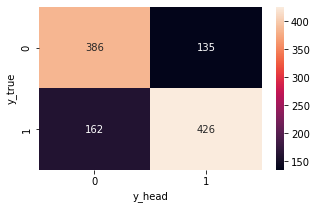


**********DecisionTreeClassifier***********


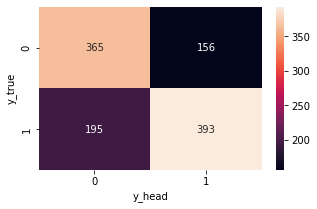


**********KNeighborsClassifier***********


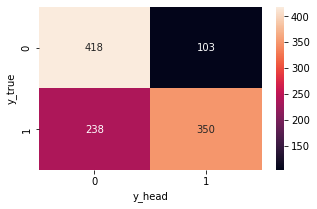

In [22]:
row_index = 0
for clf in clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    MLA_name = clf.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
    MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,new_data['existence'], cv=10).mean()
    plot_conf_matrix(y_test, predicted)
    row_index+=1



In [23]:
print('MLA Precision', round( precision_score(y_test,predicted, average='macro'), 2))
print('MLA Recall', round( recall_score(y_test,predicted, average="macro"), 2))
print('MLA F1 Score', round( f1_score(y_test,predicted, average="macro"), 2))

MLA Precision 0.7
MLA Recall 0.7
MLA F1 Score 0.69


In [24]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.86,0.73,0.76,0.72,0.74,0.27,0.706292
2,KNeighborsClassifier,0.77,0.69,0.77,0.60,0.67,0.31,0.650916
1,DecisionTreeClassifier,0.95,0.68,0.72,0.67,0.69,0.32,0.654858
